# Introduction

In this project I will load and manipulate a Saudi Stock Exchange (Tadawul), the dataset has features:
    
symbol (Integer): The symbol or the reference number of the company

name(String) Name of the company

trading_name (String): The trading name of the company

sectoer (String): The sector in which the company operates

date (Date): The date of the stock price

open (Decimal): The opening price

high (Decimal): The highest price of the stock at that day

low (Decimal): The lowest price of the stock at that day

close (Decimal): The closing price

change (Decimal): The change in price from the last day

perc_Change (Decimal): The percentage of the change

volume_traded (Decimal): The volume of the trades for the day

value_traded (Decimal): The value of the trades for the day

no_trades (Decimal): The number of trades for the day

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf


# Load and Clean data

In [3]:
#df=pd.read_csv(r"C:\Users\faris\Data-Science-Capstone-Project\Tadawul_stcks.csv")

df=pd.read_csv(r"C:\Users\فارس الدباسي\Final Project\Tadawul_stcks.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593819 entries, 0 to 593818
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   symbol          593819 non-null  int64  
 1   name            593819 non-null  object 
 2   trading_name    593819 non-null  object 
 3   sectoer         593819 non-null  object 
 4   date            593819 non-null  object 
 5   open            587364 non-null  float64
 6   high            587122 non-null  float64
 7   low             587122 non-null  float64
 8   close           593819 non-null  float64
 9   change          593819 non-null  float64
 10  perc_Change     593819 non-null  float64
 11  volume_traded   593819 non-null  float64
 12  value_traded    593819 non-null  float64
 13  no_trades       586128 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 63.4+ MB


In [5]:
df.shape

(593819, 14)

In [6]:
df.isnull().sum() #Checking null

symbol               0
name                 0
trading_name         0
sectoer              0
date                 0
open              6455
high              6697
low               6697
close                0
change               0
perc_Change          0
volume_traded        0
value_traded         0
no_trades         7691
dtype: int64

There are few nulls (compare to whole data) so it can be dropped

In [7]:
df=df.dropna()
df

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,1.539907e+07,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,2.598139e+07,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,1.711641e+07,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,2.585870e+07,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,2.574797e+07,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593814,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.90,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
593815,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.30,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
593816,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.60,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
593817,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.80,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [8]:
#Drop duplicates
df=df.drop_duplicates()

In [9]:
#Delte space from column name
df.rename(columns = {'trading_name ':'trading_name','no_trades ':'no_trades'}, inplace = True)

# Exploratory Data Analysis



How many companies in Saudi stucks?

In [10]:
len(df.trading_name.value_counts())

197

Which the highest close price in saudi stucks? and for which company?

In [11]:
df['close'].max()

6441.18

In [12]:
df[df['close']==df['close'].max()]

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
294589,4061,Anaam International Holding Group,ANAAM HOLDING,Consumer Staples,2006-02-23,6218.95,6441.18,6042.48,6441.18,578.43,9.87,208208.0,1.317992e+09,19689.0


In [13]:
sorteddf=df.groupby(by='trading_name').mean()

In [14]:
sorteddf

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
trading_name,,,,,,,,,,
A.OTHAIM MARKET,4001.0,40.395944,40.839421,39.988622,40.421840,0.029083,0.074848,6.037771e+05,1.445871e+07,584.893522
ABO MOATI,4191.0,11.556893,11.723192,11.411053,11.556469,0.027267,0.065518,1.747087e+05,3.010718e+06,196.876061
ACC,3010.0,47.748002,48.359410,47.200169,47.791948,0.006992,0.025871,3.615566e+05,2.242255e+07,376.199410
ACIG,8150.0,25.775405,26.356042,25.232893,25.745958,0.014379,0.021142,8.792116e+05,2.703050e+07,978.945955
ADC,2140.0,17.684678,18.075238,17.340410,17.703456,0.002491,0.056952,2.623649e+06,6.683624e+07,1185.721077
...,...,...,...,...,...,...,...,...,...,...
YCC,3060.0,46.209258,46.746177,45.703672,46.239821,0.007352,0.027380,2.887512e+05,1.520039e+07,218.370768
YSCC,3020.0,38.490201,38.958974,38.059824,38.513910,0.004862,0.016993,5.115236e+05,2.538267e+07,339.148963
ZAIN KSA,7030.0,22.085857,22.379836,21.774589,22.062491,0.003450,-0.042648,5.707290e+06,1.377825e+08,3491.684881


In [15]:
sorteddf['perc_Change']=sorteddf['perc_Change']*100 

Categorized to high risk and low risk based on percentage Change	

In [16]:
sorteddf['Risk']=["High" if a>0 else "low" for a in sorteddf['perc_Change']]

In [17]:
sorteddf

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,Risk
trading_name,,,,,,,,,,,
A.OTHAIM MARKET,4001.0,40.395944,40.839421,39.988622,40.421840,0.029083,7.484838,6.037771e+05,1.445871e+07,584.893522,High
ABO MOATI,4191.0,11.556893,11.723192,11.411053,11.556469,0.027267,6.551783,1.747087e+05,3.010718e+06,196.876061,High
ACC,3010.0,47.748002,48.359410,47.200169,47.791948,0.006992,2.587057,3.615566e+05,2.242255e+07,376.199410,High
ACIG,8150.0,25.775405,26.356042,25.232893,25.745958,0.014379,2.114239,8.792116e+05,2.703050e+07,978.945955,High
ADC,2140.0,17.684678,18.075238,17.340410,17.703456,0.002491,5.695204,2.623649e+06,6.683624e+07,1185.721077,High
...,...,...,...,...,...,...,...,...,...,...,...
YCC,3060.0,46.209258,46.746177,45.703672,46.239821,0.007352,2.737960,2.887512e+05,1.520039e+07,218.370768,High
YSCC,3020.0,38.490201,38.958974,38.059824,38.513910,0.004862,1.699323,5.115236e+05,2.538267e+07,339.148963,High
ZAIN KSA,7030.0,22.085857,22.379836,21.774589,22.062491,0.003450,-4.264834,5.707290e+06,1.377825e+08,3491.684881,low


In [18]:
sorteddf.Risk.value_counts()


High    148
low      49
Name: Risk, dtype: int64

The highest change

In [19]:
sorteddf[sorteddf['perc_Change']==sorteddf.perc_Change.max()]

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,Risk
trading_name,,,,,,,,,,,
ALKATHIRI,3008.0,51.302991,52.332493,50.265337,51.167126,0.295161,72.108504,84855.249267,8.779093e+06,456.331378,High


In [20]:
sorteddf.perc_Change.min()

-9.884146341463415

In [22]:
top_5_perc_Change=sorteddf.nlargest(5, 'perc_Change')

In [35]:
top_5_perc_Change

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,Risk
trading_name,,,,,,,,,,,
ALKATHIRI,3008.0,51.302991,52.332493,50.265337,51.167126,0.295161,72.108504,84855.249267,8.779093e+06,456.331378,High
ANAAM HOLDING,4061.0,648.333630,663.479573,634.455424,648.707251,0.030891,44.136730,104723.731517,1.121929e+08,2348.642417,High
ARAB SEA,7201.0,13.971847,14.255864,13.732254,14.013051,0.030898,26.316949,93827.762712,1.725014e+06,107.291525,High
NCLE,4291.0,24.525866,24.888602,24.276869,24.576018,0.050304,21.206687,330561.747720,7.776265e+06,485.492401,High
ATAA,4292.0,31.105960,31.582781,30.753311,31.138079,0.055629,19.072848,364223.668874,1.178706e+07,604.052980,High


In [46]:
top_5_names=list(top_5_perc_Change.index)
top_5_close=list(top_5_perc_Change.change)
top_5_names

['ALKATHIRI', 'ANAAM HOLDING', 'ARAB SEA', 'NCLE', 'ATAA']

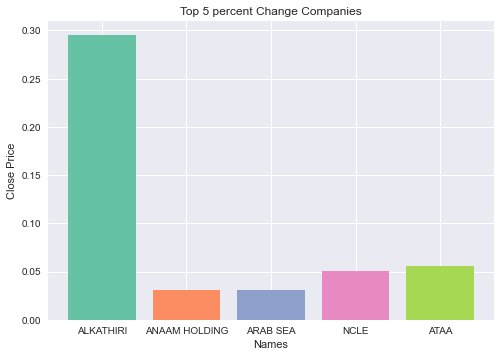

In [49]:
plt.style.use('seaborn')
colors = plt.cm.Set2(range(len(top_5_close)))

plt.bar(top_5_names, top_5_close,color=colors)

# Set the title and axis labels
plt.title('Top 5 percent Change Companies')
plt.xlabel('Names')
plt.ylabel('Close Price')
plt.show()
